## Importing Necessary Libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

## Loading train dataset.

In [3]:
dataframe=pd.read_csv('train.csv')

## DataUnderstanding.

In [4]:
dataframe.keys()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
data=dataframe
type(data)

pandas.core.frame.DataFrame

In [6]:
data.shape                                                  # 1460 rows and 81 columns

(1460, 81)

In [7]:
data.isnull().sum()                                         # Checking for the presence of null values.

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
[col for col in data.columns if data[col].isnull().any()]   # Displaying all columns with null values

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [9]:
null_values = data.isnull().sum()                                     # All null values columns in descending order
null_values = null_values[null_values>0]
print('all null:\n')
print(null_values.sort_values(ascending=False))

all null:

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


In [10]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [11]:
data.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [12]:
data.shape

(1460, 81)

In [13]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## Loading test data

In [15]:
test_df=pd.read_csv('test.csv')

In [16]:
# Observing the test data set.
test_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [17]:
test_df.shape

(1459, 80)

In [18]:
test_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [19]:
test_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [20]:
[col for col in test_df.columns if test_df[col].isnull().any()]   # Displaying all columns with null values

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [21]:
null_values = test_df.isnull().sum()                                     # All null values columns in descending order
null_values = null_values[null_values>0]
print('all null:\n')
print(null_values.sort_values(ascending=False))

all null:

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageCond        78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Exterior2nd        1
Exterior1st        1
SaleType           1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
KitchenQual        1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
dtype: int64


## Checking for Outliers.

<AxesSubplot:xlabel='GrLivArea'>

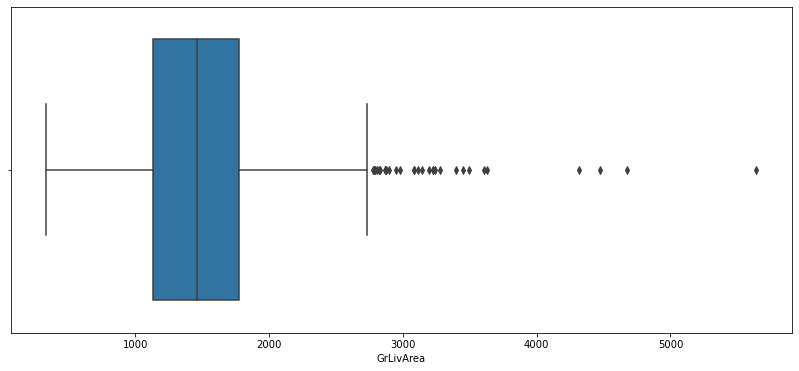

In [22]:
plt.figure(figsize=(14, 6))                                                      
sns.boxplot(x='GrLivArea',data=data)            

<AxesSubplot:xlabel='GarageArea'>

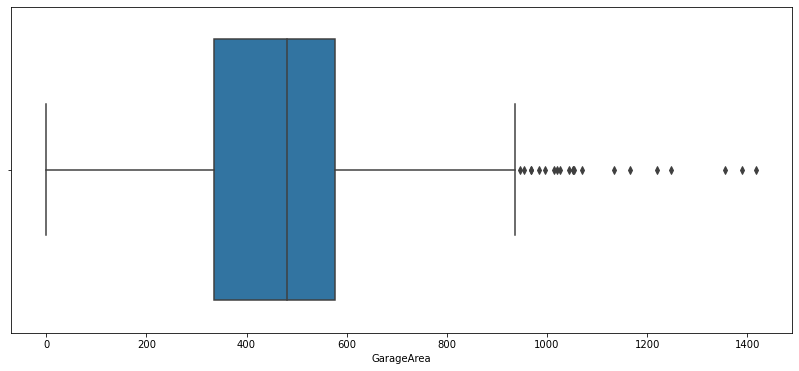

In [23]:
plt.figure(figsize=(14, 6))                                                
sns.boxplot(x='GarageArea',data=data)

<AxesSubplot:xlabel='1stFlrSF'>

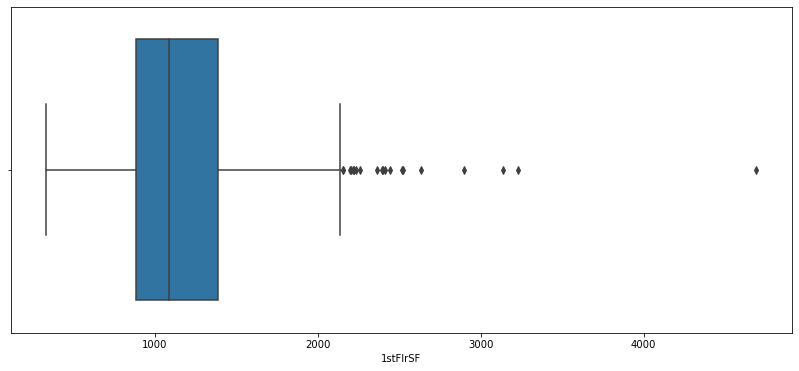

In [24]:
plt.figure(figsize=(14, 6))                                                     
sns.boxplot(x='1stFlrSF',data=data)

<AxesSubplot:xlabel='BsmtFinSF1'>

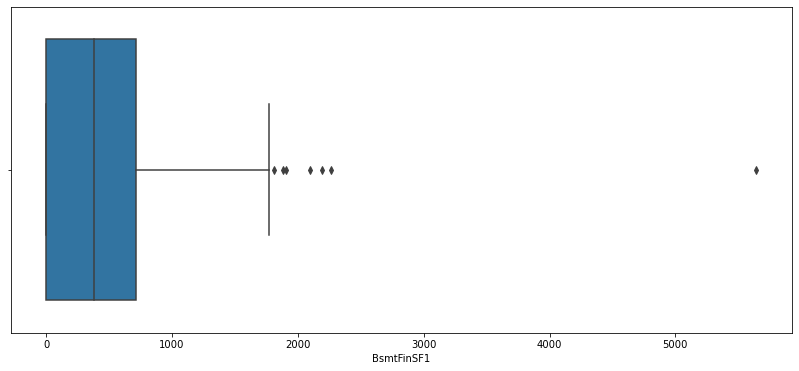

In [25]:
plt.figure(figsize=(14, 6))                                                       
sns.boxplot(x='BsmtFinSF1',data=data)

<AxesSubplot:xlabel='LotArea'>

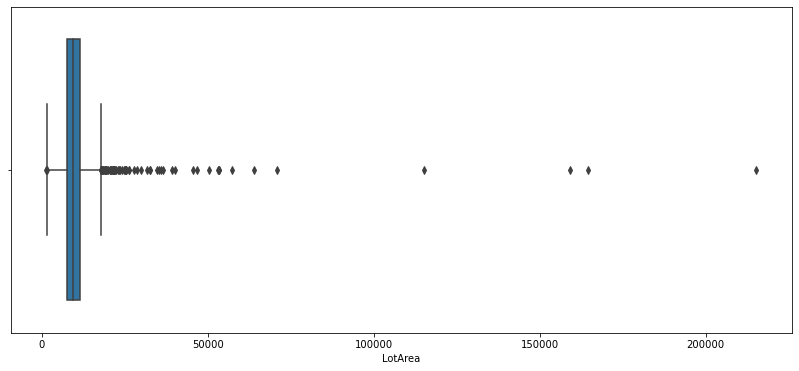

In [26]:
plt.figure(figsize=(14, 6))                                                       
sns.boxplot(x='LotArea',data=data)

### Outlier Treatment

In [27]:
data = data[(data['GrLivArea']<3500)]
data = data[(data['GarageArea']<1100)]
data = data[(data['1stFlrSF']<3000)]
data = data[(data['BsmtFinSF1']<2300)]
data = data[(data['LotArea']<100000)]

### test dataset columns have new values compared to train dataset

In [28]:
data['BedroomAbvGr'].value_counts()          # BedroomAbvGr #TotRmsAbvGrd #Utilities #KitchenAbvGr 

3    798
2    355
4    207
1     48
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

In [29]:
test_df['BedroomAbvGr'].value_counts()

3    792
2    384
4    187
1     53
5     27
6     14
0      2
Name: BedroomAbvGr, dtype: int64

In [30]:
final_df=pd.concat([data,test_df],axis=0)

C:\Users\Rahul\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [31]:
final_df

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,546,546,0,NaN,3,Twnhs,TA,No,0.0,0.0,...,WD,0,Pave,5,546.0,AllPub,0,1970,1970,2006
1455,546,546,0,NaN,3,TwnhsE,TA,No,252.0,0.0,...,WD,0,Pave,6,546.0,AllPub,0,1970,1970,2006
1456,1224,0,0,NaN,4,1Fam,TA,No,1224.0,0.0,...,WD,0,Pave,7,1224.0,AllPub,474,1960,1996,2006
1457,970,0,0,NaN,3,1Fam,TA,Av,337.0,0.0,...,WD,0,Pave,6,912.0,AllPub,80,1992,1992,2006


In [32]:
final_df.shape

(2902, 81)

In [33]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2902 entries, 0 to 1458
Data columns (total 81 columns):
1stFlrSF         2902 non-null int64
2ndFlrSF         2902 non-null int64
3SsnPorch        2902 non-null int64
Alley            198 non-null object
BedroomAbvGr     2902 non-null int64
BldgType         2902 non-null object
BsmtCond         2820 non-null object
BsmtExposure     2820 non-null object
BsmtFinSF1       2901 non-null float64
BsmtFinSF2       2901 non-null float64
BsmtFinType1     2823 non-null object
BsmtFinType2     2822 non-null object
BsmtFullBath     2900 non-null float64
BsmtHalfBath     2900 non-null float64
BsmtQual         2821 non-null object
BsmtUnfSF        2901 non-null float64
CentralAir       2902 non-null object
Condition1       2902 non-null object
Condition2       2902 non-null object
Electrical       2901 non-null object
EnclosedPorch    2902 non-null int64
ExterCond        2902 non-null object
ExterQual        2902 non-null object
Exterior1st      290

In [34]:
print(final_df.columns.tolist())

['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation', 'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr', 'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig', 'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning', 'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold', 'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PavedDrive', 'PoolArea', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SalePrice', 'SaleType', 'ScreenPorch', 'Street'

## Data cleaning and Imputation.

In [35]:
# Imputing columns using statistics.
# Finding the dtypes of the columns.

In [36]:
# Dropping Unnecessary columns
final_df.drop(['Id'],axis=1,inplace=True)

In [37]:
# Dropping columns with more than 50% missing data.
final_df.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)

In [38]:
final_df["LotFrontage"]=final_df["LotFrontage"].fillna(final_df["LotFrontage"].mode()[0])
final_df["GarageYrBlt"]=final_df["GarageYrBlt"].fillna(final_df["GarageYrBlt"].mode()[0])          
final_df["GarageType"]=final_df["GarageType"].fillna(final_df["GarageType"].mode()[0])    # Mode has been used to impute the categorical data
final_df["GarageFinish"]=final_df["GarageFinish"].fillna(final_df["GarageFinish"].mode()[0])
final_df["GarageQual"]=final_df["GarageQual"].fillna(final_df["GarageQual"].mode()[0])
final_df["GarageCond"]=final_df["GarageCond"].fillna(final_df["GarageCond"].mode()[0])
final_df["BsmtFinType2"]=final_df["BsmtFinType2"].fillna(final_df["BsmtFinType2"].mode()[0])
final_df["BsmtExposure"]=final_df["BsmtExposure"].fillna(final_df["BsmtExposure"].mode()[0])
final_df["BsmtFinType1"]=final_df["BsmtFinType1"].fillna(final_df["BsmtFinType1"].mode()[0])
final_df["BsmtCond"]=final_df["BsmtCond"].fillna(final_df["BsmtCond"].mode()[0])
final_df["BsmtQual"]=final_df["BsmtQual"].fillna(final_df["BsmtQual"].mode()[0])
final_df["MasVnrType"]=final_df["MasVnrType"].fillna(final_df["MasVnrType"].mode()[0])
final_df["Electrical"]=final_df["Electrical"].fillna(final_df["Electrical"].mode()[0])
final_df["MSZoning"]=final_df["MSZoning"].fillna(final_df["MSZoning"].mode()[0])
final_df["Utilities"]=final_df["Utilities"].fillna(final_df["Utilities"].mode()[0])
final_df["Exterior1st"]=final_df["Exterior1st"].fillna(final_df["Exterior1st"].mode()[0])
final_df["Exterior2nd"]=final_df["Exterior2nd"].fillna(final_df["Exterior2nd"].mode()[0])
final_df["KitchenQual"]=final_df["KitchenQual"].fillna(final_df["KitchenQual"].mode()[0])
final_df["Functional"]=final_df["Functional"].fillna(final_df["Functional"].mode()[0])
final_df["SaleType"]=final_df["SaleType"].fillna(final_df["SaleType"].mode()[0])
final_df["GarageCars"]=final_df["GarageCars"].fillna(final_df["GarageCars"].mode()[0])

In [39]:
final_df["BsmtFinSF1"]=final_df["BsmtFinSF1"].fillna(final_df["BsmtFinSF1"].mean())
final_df["BsmtFinSF2"]=final_df["BsmtFinSF2"].fillna(final_df["BsmtFinSF2"].mean())                                                            
final_df["BsmtUnfSF"]=final_df["BsmtUnfSF"].fillna(final_df["BsmtUnfSF"].mean())        
final_df["TotalBsmtSF"]=final_df["TotalBsmtSF"].fillna(final_df["TotalBsmtSF"].mean()) 
final_df["BsmtFullBath"]=final_df["BsmtFullBath"].fillna(final_df["BsmtFullBath"].mean())
final_df["BsmtHalfBath"]=final_df["BsmtHalfBath"].fillna(final_df["BsmtHalfBath"].mean())
final_df["GarageArea"]=final_df["GarageArea"].fillna(final_df["GarageArea"].mean())
final_df["MasVnrArea"]=final_df["MasVnrArea"].fillna(final_df["MasVnrArea"].mean())    # Mean used to impute MasVnArea(numeric) column

In [40]:
data.shape

(1443, 81)

In [41]:
test_df.shape

(1459, 80)

In [42]:
final_df.shape         

(2902, 75)

## Label encoding catergorical columns.

In [43]:
cat_cols=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition']
le=LabelEncoder()
for i in cat_cols:
    final_df[i]=le.fit_transform(final_df[i])
final_df.dtypes

1stFlrSF        int64
2ndFlrSF        int64
3SsnPorch       int64
BedroomAbvGr    int64
BldgType        int32
                ...  
Utilities       int32
WoodDeckSF      int64
YearBuilt       int64
YearRemodAdd    int64
YrSold          int64
Length: 75, dtype: object

In [44]:
final_df['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2902, dtype: float64

In [45]:
df_Train=final_df.iloc[:1443,:]
df_Test=final_df.iloc[1460:,:]

In [46]:
df_Train.shape

(1443, 75)

In [47]:
df_Train['SalePrice'].isnull().sum()

0

In [48]:
df_Test.shape

(1442, 75)

In [49]:
df_Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1443 entries, 0 to 1459
Data columns (total 75 columns):
1stFlrSF         1443 non-null int64
2ndFlrSF         1443 non-null int64
3SsnPorch        1443 non-null int64
BedroomAbvGr     1443 non-null int64
BldgType         1443 non-null int32
BsmtCond         1443 non-null int32
BsmtExposure     1443 non-null int32
BsmtFinSF1       1443 non-null float64
BsmtFinSF2       1443 non-null float64
BsmtFinType1     1443 non-null int32
BsmtFinType2     1443 non-null int32
BsmtFullBath     1443 non-null float64
BsmtHalfBath     1443 non-null float64
BsmtQual         1443 non-null int32
BsmtUnfSF        1443 non-null float64
CentralAir       1443 non-null int32
Condition1       1443 non-null int32
Condition2       1443 non-null int32
Electrical       1443 non-null int32
EnclosedPorch    1443 non-null int64
ExterCond        1443 non-null int32
ExterQual        1443 non-null int32
Exterior1st      1443 non-null int32
Exterior2nd      1443 non-null i

## Distribution plot.

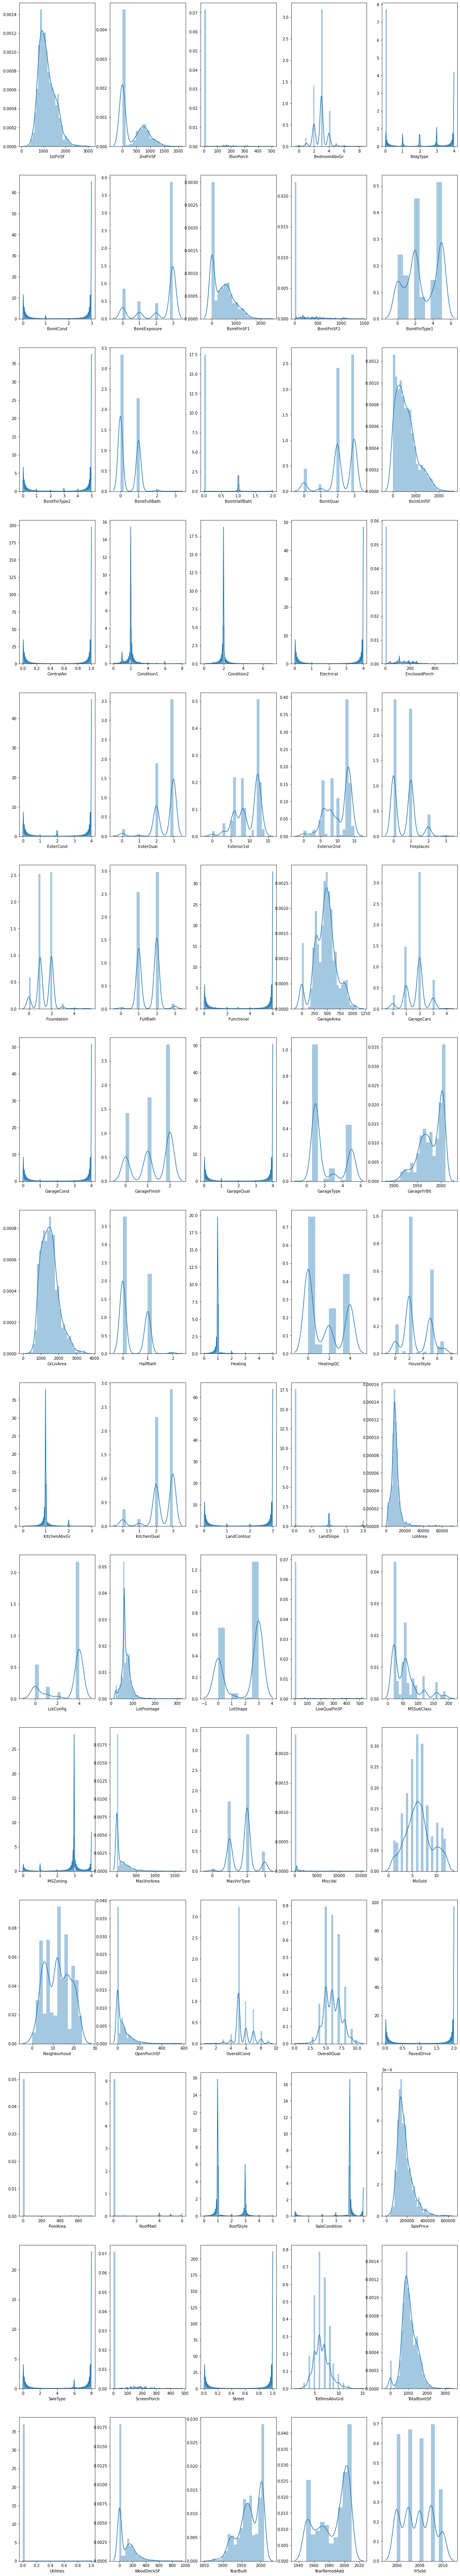

In [50]:
rows=15
cols=5
fig, ax=plt.subplots(nrows=rows,ncols=cols,figsize=(20,120))
col=df_Train.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.distplot(df_Train[col[index]],ax=ax[i][j])
        index=index+1
        
plt.show()

In [51]:
df_Train['SalePrice']=np.log(df_Train.SalePrice)               # Log Transformation.

C:\Users\Rahul\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


[]

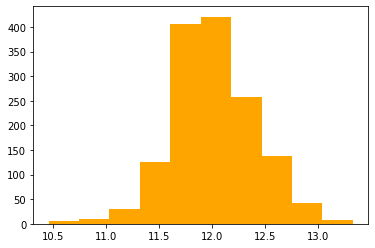

In [52]:
plt.hist(df_Train['SalePrice'],color='orange')
plt.plot()

In [53]:
df_Test['SalePrice']

17     NaN
18     NaN
19     NaN
20     NaN
21     NaN
        ..
1454   NaN
1455   NaN
1456   NaN
1457   NaN
1458   NaN
Name: SalePrice, Length: 1442, dtype: float64

In [54]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

C:\Users\Rahul\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## DataVisualization.

In [55]:
#sns.pairplot(df_Train)

## Printing top 5 and last 5 highly correlated variables.

In [56]:
corr=df_Train.corr()
print(corr['SalePrice'].sort_values(ascending=False)[:5])                   
print(corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.817487
GrLivArea      0.711126
GarageCars     0.684027
GarageArea     0.664392
Name: SalePrice, dtype: float64
HeatingQC      -0.427146
KitchenQual    -0.524856
BsmtQual       -0.572239
GarageFinish   -0.576765
ExterQual      -0.588600
Name: SalePrice, dtype: float64


In [57]:
mycorr=df_Train[["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "GarageArea"]]

In [58]:
mycorr

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea
0,12.247694,7,1710,2.0,548.0
1,12.109011,6,1262,2.0,460.0
2,12.317167,7,1786,2.0,608.0
3,11.849398,7,1717,3.0,642.0
4,12.429216,8,2198,3.0,836.0
...,...,...,...,...,...
1455,12.072541,6,1647,2.0,460.0
1456,12.254863,6,2073,2.0,500.0
1457,12.493130,7,2340,1.0,252.0
1458,11.864462,5,1078,1.0,240.0


In [59]:
X2=mycorr.drop(labels=['SalePrice'],axis=1)                         #GrLivArea' 'OverallQual' 'SalePrice
Y2=mycorr['SalePrice']
X2.head()

,OverallQual,GrLivArea,GarageCars,GarageArea
0,7,1710,2.0,548.0
1,6,1262,2.0,460.0
2,7,1786,2.0,608.0
3,7,1717,3.0,642.0
4,8,2198,3.0,836.0


In [60]:
X2_train,X2_test,Y2_train,Y2_test=train_test_split(X2,Y2,test_size=0.2,random_state=0)
print(X2_train.shape,X2_test.shape,Y2_train.shape,Y2_test.shape)

(1154, 4) (289, 4) (1154,) (289,)


In [61]:
scaled=StandardScaler()
X2_train=scaled.fit_transform(X2_train)
X2_test=scaled.transform(X2_test)

In [62]:
model2=LinearRegression()
model2.fit(X2_train,Y2_train)

LinearRegression()

In [63]:
Y2_predict=model2.predict(X2_test)

In [64]:
score=r2_score(Y2_test,Y2_predict)
mae=mean_absolute_error(Y2_test,Y2_predict)
mse=mean_squared_error(Y2_test,Y2_predict)
rmse=(np.sqrt(mean_squared_error(Y2_test,Y2_predict)))
print('r2_score: ',score)
print('mean_absolute_error: ',mae)
print('mean_squared_error: ',mse)
print('root_mean_squared_error: ',rmse)

r2_score:  0.8177006510050059
mean_absolute_error:  0.12207543874956447
mean_squared_error:  0.025956050547718355
root_mean_squared_error:  0.16110881585971126


In [65]:
from sklearn.tree import DecisionTreeRegressor

In [66]:
DT2=DecisionTreeRegressor()
DT2.fit(X2_train,Y2_train)

DecisionTreeRegressor()

In [67]:
test_preds2=DT2.predict(X2_test)

In [68]:
score=r2_score(Y2_test,test_preds2)
mae=mean_absolute_error(Y2_test,test_preds2)
mse=mean_squared_error(Y2_test,test_preds2)
rmse=(np.sqrt(mean_squared_error(Y2_test,test_preds2)))
print('r2_score: ',score)
print('mean_absolute_error: ',mae)
print('mean_squared_error: ',mse)
print('root_mean_squared_error: ',rmse)

r2_score:  0.5844799578346139
mean_absolute_error:  0.17813095593475212
mean_squared_error:  0.05916235728483587
root_mean_squared_error:  0.2432331336081412


In [69]:
from sklearn.ensemble import RandomForestRegressor

In [70]:
RF2=RandomForestRegressor().fit(X2_train,Y2_train)

In [71]:
test_preds3=RF2.predict(X2_test)

In [72]:
score=r2_score(Y2_test,test_preds3)
mae=mean_absolute_error(Y2_test,test_preds3)
mse=mean_squared_error(Y2_test,test_preds3)
rmse=(np.sqrt(mean_squared_error(Y2_test,test_preds3)))
print('r2_score: ',score)
print('mean_absolute_error: ',mae)
print('mean_squared_error: ',mse)
print('root_mean_squared_error: ',rmse)

r2_score:  0.8070272637752552
mean_absolute_error:  0.1221449550282611
mean_squared_error:  0.02747574318501015
root_mean_squared_error:  0.16575808633369943


## Finding correlation using correlation matrix.

In [73]:
corrmat=df_Train.corr()
corrmat

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
1stFlrSF,1.000000,-0.256087,0.064330,0.131536,-0.067090,0.022200,-0.232489,0.369134,0.105767,-0.105043,...,-0.117186,0.101297,0.012937,0.382868,0.790924,0.014111,0.224874,0.278895,0.235420,-0.006129
2ndFlrSF,-0.256087,1.000000,-0.024004,0.500759,-0.082296,-0.054827,0.138749,-0.183493,-0.096989,0.182529,...,0.051487,0.030242,0.042191,0.613644,-0.229173,-0.021073,0.086657,0.008358,0.136445,-0.019144
3SsnPorch,0.064330,-0.024004,1.000000,-0.024571,-0.023299,0.033100,0.013540,0.031929,-0.030164,-0.042904,...,-0.009538,-0.031780,0.006170,-0.004983,0.044784,-0.003082,-0.032154,0.031987,0.046085,0.018297
BedroomAbvGr,0.131536,0.500759,-0.024571,1.000000,-0.280032,-0.036344,0.125482,-0.116212,-0.016375,0.108492,...,0.027283,0.038602,0.023705,0.686156,0.049236,0.004354,0.044207,-0.068376,-0.040865,-0.032556
BldgType,-0.067090,-0.082296,-0.023299,-0.280032,1.000000,0.033311,-0.048922,0.017236,-0.017422,-0.046221,...,-0.042528,-0.027465,-0.022007,-0.196358,-0.041691,-0.010886,-0.013290,0.221068,0.108307,0.000810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Utilities,0.014111,-0.021073,-0.003082,0.004354,-0.010886,0.007448,0.016364,-0.019911,0.050359,-0.011376,...,-0.127537,0.104267,0.001388,0.008333,-0.014662,1.000000,-0.019780,-0.011488,-0.034136,0.023345
WoodDeckSF,0.224874,0.086657,-0.032154,0.044207,-0.013290,0.003166,-0.200558,0.189214,0.072502,-0.111114,...,0.056098,-0.070146,0.028311,0.161240,0.225972,-0.019780,1.000000,0.224600,0.209044,0.029804
YearBuilt,0.278895,0.008358,0.031987,-0.068376,0.221068,0.150005,-0.303515,0.243845,-0.047965,-0.138498,...,-0.050471,-0.037094,0.007271,0.091528,0.400563,-0.011488,0.224600,1.000000,0.592666,-0.014772
YearRemodAdd,0.235420,0.136445,0.046085,-0.040865,0.108307,0.018314,-0.214443,0.117472,-0.063324,-0.024326,...,0.020619,-0.040395,0.045365,0.185702,0.293713,-0.034136,0.209044,0.592666,1.000000,0.038790


## Plotting the correlation matrix into a heatmap.

In [74]:
#fig, ax=plt.subplots(figsize=(18,10))
#ax =sns.heatmap(corrmat, annot=True,annot_kws={'size': 14}) 
#bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5, top - 0.5)

In [75]:
corrmat.index.values

array(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BldgType',
       'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual',
       'Exterior1st', 'Exterior2nd', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt',
       'GrLivArea', 'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle',
       'KitchenAbvGr', 'KitchenQual', 'LandContour', 'LandSlope',
       'LotArea', 'LotConfig', 'LotFrontage', 'LotShape', 'LowQualFinSF',
       'MSSubClass', 'MSZoning', 'MasVnrArea', 'MasVnrType', 'MiscVal',
       'MoSold', 'Neighborhood', 'OpenPorchSF', 'OverallCond',
       'OverallQual', 'PavedDrive', 'PoolArea', 'RoofMatl', 'RoofStyle',
       'SaleCondition', 'SalePri

In [76]:
def getCorrelatedFeature(corrdata, threshold):
    feature=[]
    value=[]

    for i, index in enumerate(corrmat.index):
        if abs(corrdata[index])> threshold:
            feature.append(index)
            value.append(corrdata[index])
        
    df1=pd.DataFrame(data=value,index=feature,columns=['Corr Value'])
    return df1

In [77]:
threshold=0.50
Corr_Value=getCorrelatedFeature(corrmat['SalePrice'],threshold)
Corr_Value

,Corr Value
1stFlrSF,0.602947
BsmtQual,-0.572239
ExterQual,-0.588600
FullBath,0.588720
GarageArea,0.664392
GarageCars,0.684027
GarageFinish,-0.576765
GrLivArea,0.711126
KitchenQual,-0.524856
OverallQual,0.817487


In [78]:
Corr_Value.index.values

array(['1stFlrSF', 'BsmtQual', 'ExterQual', 'FullBath', 'GarageArea',
       'GarageCars', 'GarageFinish', 'GrLivArea', 'KitchenQual',
       'OverallQual', 'SalePrice', 'TotRmsAbvGrd', 'TotalBsmtSF',
       'YearBuilt', 'YearRemodAdd'], dtype=object)

In [79]:
correlated_data=df_Train[Corr_Value.index]

In [80]:
correlated_data

,1stFlrSF,BsmtQual,ExterQual,FullBath,GarageArea,GarageCars,GarageFinish,GrLivArea,KitchenQual,OverallQual,SalePrice,TotRmsAbvGrd,TotalBsmtSF,YearBuilt,YearRemodAdd
0,856,2,2,2,548.0,2.0,1,1710,2,7,12.247694,8,856.0,2003,2003
1,1262,2,3,2,460.0,2.0,1,1262,3,6,12.109011,6,1262.0,1976,1976
2,920,2,2,2,608.0,2.0,1,1786,2,7,12.317167,6,920.0,2001,2002
3,961,3,3,1,642.0,3.0,2,1717,2,7,11.849398,7,756.0,1915,1970
4,1145,2,2,2,836.0,3.0,1,2198,2,8,12.429216,9,1145.0,2000,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,953,2,3,2,460.0,2.0,1,1647,3,6,12.072541,7,953.0,1999,2000
1456,2073,2,3,2,500.0,2.0,2,2073,3,6,12.254863,7,1542.0,1978,1988
1457,1188,3,0,2,252.0,1.0,1,2340,2,7,12.493130,9,1152.0,1941,2006
1458,1078,3,3,1,240.0,1.0,2,1078,2,5,11.864462,5,1078.0,1950,1996


## Pair Plotting this Correlated data.

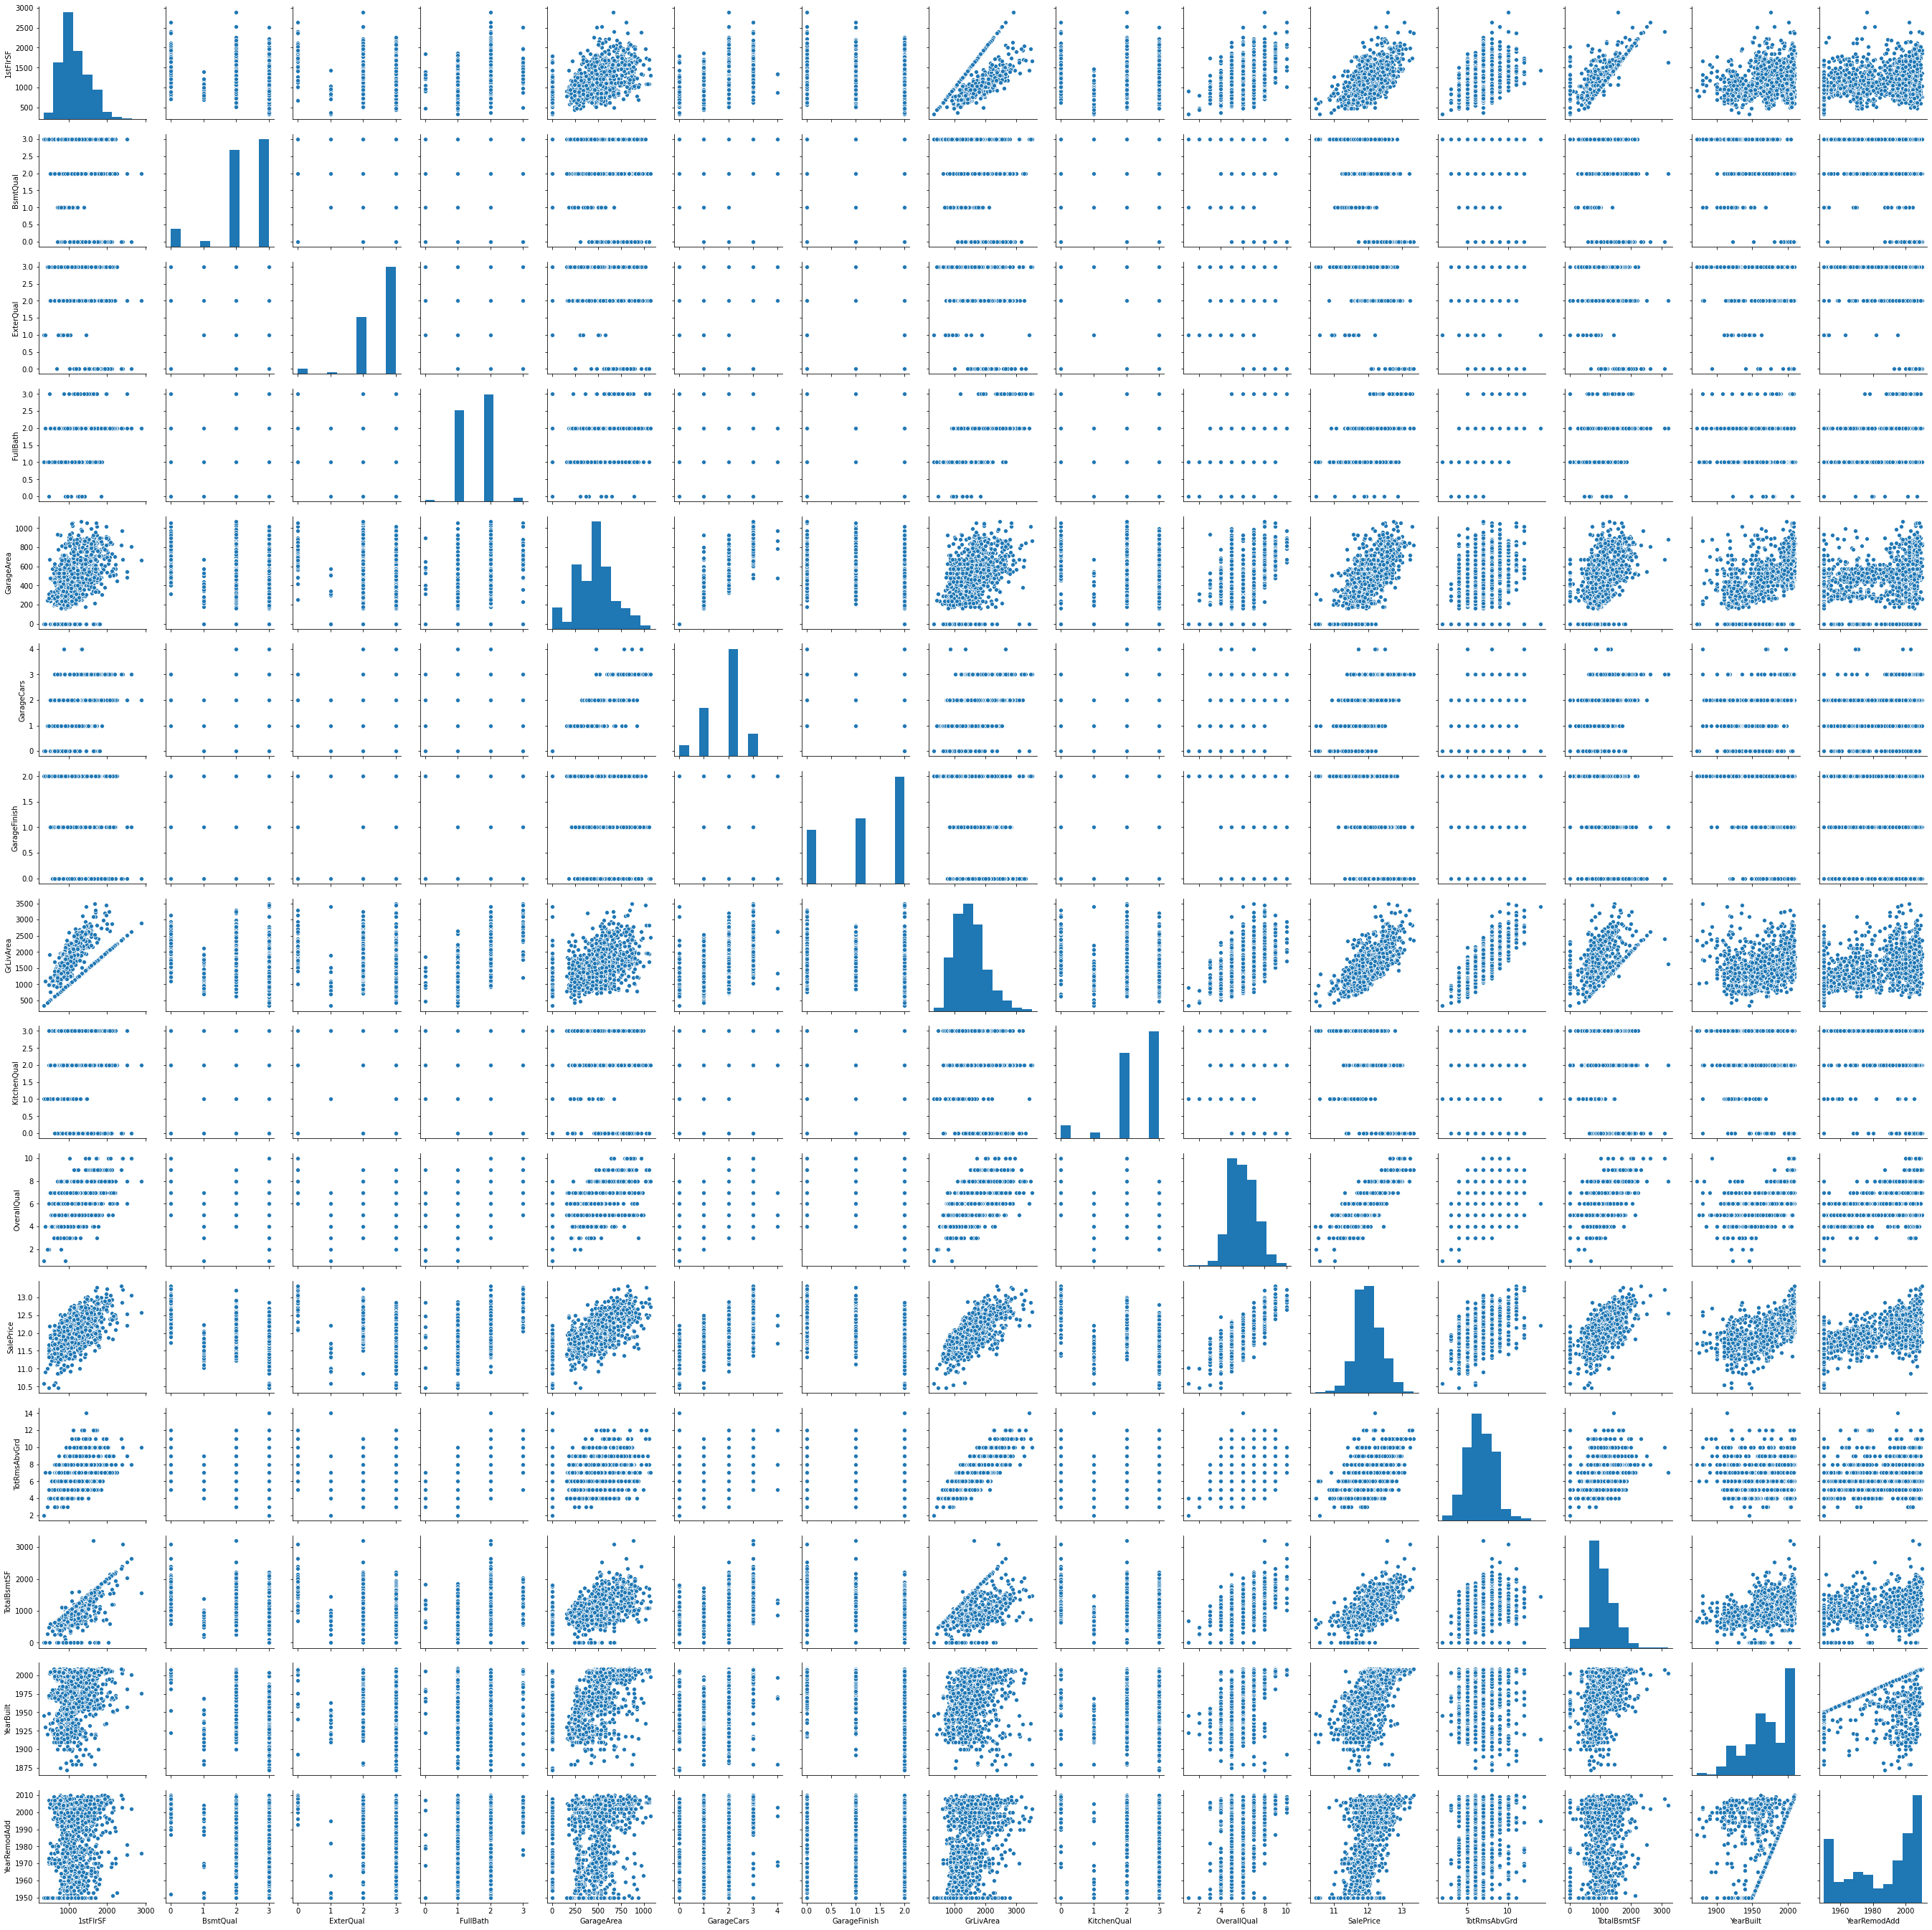

In [81]:
sns.pairplot(data=correlated_data)

## Heat Map of this Correlated data.

(15.5, -0.5)

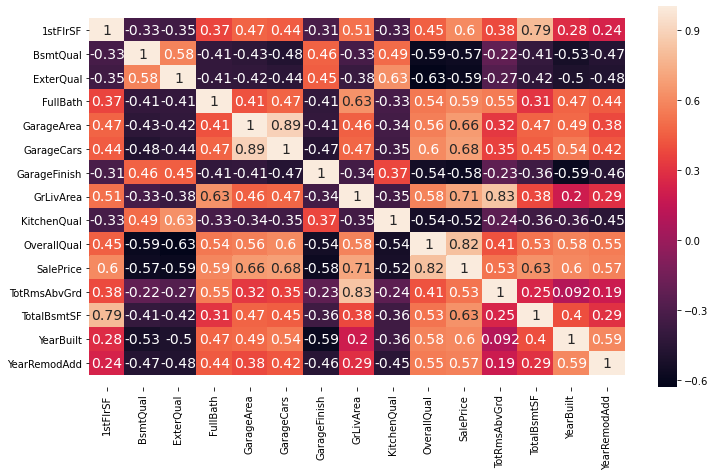

In [82]:
fig, ax=plt.subplots(figsize=(12,7))
ax =sns.heatmap(correlated_data.corr(), annot=True,annot_kws={'size': 14}) 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## Split dataset. 

In [83]:
X=correlated_data.drop(labels=['SalePrice'],axis=1)
Y=correlated_data['SalePrice']
X.head()

,1stFlrSF,BsmtQual,ExterQual,FullBath,GarageArea,GarageCars,GarageFinish,GrLivArea,KitchenQual,OverallQual,TotRmsAbvGrd,TotalBsmtSF,YearBuilt,YearRemodAdd
0,856,2,2,2,548.0,2.0,1,1710,2,7,8,856.0,2003,2003
1,1262,2,3,2,460.0,2.0,1,1262,3,6,6,1262.0,1976,1976
2,920,2,2,2,608.0,2.0,1,1786,2,7,6,920.0,2001,2002
3,961,3,3,1,642.0,3.0,2,1717,2,7,7,756.0,1915,1970
4,1145,2,2,2,836.0,3.0,1,2198,2,8,9,1145.0,2000,2000


In [84]:
Y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [85]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(1154, 14) (289, 14) (1154,) (289,)


## Training the model.

In [86]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [87]:
Y_predict=model.predict(X_test)

In [88]:
Y_predict

array([12.15589317, 12.0613562 , 12.06502887, 12.71466216, 12.08582479,
       11.57625946, 11.44390009, 12.1116171 , 12.04802195, 12.21474717,
       11.66341684, 12.54133989, 12.18497576, 11.60513119, 11.83395923,
       11.80436472, 11.64379303, 11.75832531, 11.71845181, 11.73890632,
       12.55749965, 11.70201705, 11.97367198, 11.72589041, 11.4869634 ,
       12.12004148, 11.88096111, 12.44770183, 12.13962033, 11.7089884 ,
       12.64509254, 11.42493213, 11.31264538, 11.78037207, 12.09045364,
       12.26330642, 11.67381522, 12.63094138, 12.44891566, 12.08623538,
       12.36502263, 12.29053912, 12.53949738, 11.75942207, 12.55150513,
       11.81083962, 12.07310004, 11.68321231, 12.36821085, 12.01761669,
       11.61485162, 11.90441011, 12.53783511, 12.18796894, 11.75353835,
       12.68776236, 12.04261758, 11.6288974 , 11.71060394, 12.03683529,
       11.55760411, 12.47565178, 12.08810495, 12.73568677, 11.83070398,
       12.01092553, 11.79473994, 11.60087397, 12.12605883, 11.84

In [89]:
Y_predict,Y_test

(array([12.15589317, 12.0613562 , 12.06502887, 12.71466216, 12.08582479,
        11.57625946, 11.44390009, 12.1116171 , 12.04802195, 12.21474717,
        11.66341684, 12.54133989, 12.18497576, 11.60513119, 11.83395923,
        11.80436472, 11.64379303, 11.75832531, 11.71845181, 11.73890632,
        12.55749965, 11.70201705, 11.97367198, 11.72589041, 11.4869634 ,
        12.12004148, 11.88096111, 12.44770183, 12.13962033, 11.7089884 ,
        12.64509254, 11.42493213, 11.31264538, 11.78037207, 12.09045364,
        12.26330642, 11.67381522, 12.63094138, 12.44891566, 12.08623538,
        12.36502263, 12.29053912, 12.53949738, 11.75942207, 12.55150513,
        11.81083962, 12.07310004, 11.68321231, 12.36821085, 12.01761669,
        11.61485162, 11.90441011, 12.53783511, 12.18796894, 11.75353835,
        12.68776236, 12.04261758, 11.6288974 , 11.71060394, 12.03683529,
        11.55760411, 12.47565178, 12.08810495, 12.73568677, 11.83070398,
        12.01092553, 11.79473994, 11.60087397, 12.1

In [90]:
df=pd.DataFrame(data=[Y_predict,Y_test])

In [91]:
df.T                                               ## Above 0 means Predicted Value and 1 is True Value. ##

,0,1
0,12.155893,12.230765
1,12.061356,11.951180
2,12.065029,12.061047
3,12.714662,12.631014
4,12.085825,12.066236
...,...,...
284,12.117480,12.289954
285,12.073943,12.138864
286,10.871312,10.578980
287,11.910314,11.940393


## Evaluation metrics.

In [92]:
score=r2_score(Y_test,Y_predict)
mae=mean_absolute_error(Y_test,Y_predict)
mse=mean_squared_error(Y_test,Y_predict)
rmse=(np.sqrt(mean_squared_error(Y_test,Y_predict)))
print('r2_score: ',score)
print('mean_absolute_error: ',mae)
print('mean_squared_error: ',mse)
print('root_mean_squared_error: ',rmse)

r2_score:  0.8578340837206089
mean_absolute_error:  0.10780905203774059
mean_squared_error:  0.020241793124625478
root_mean_squared_error:  0.14227365576460554


## Store these features into pandas dataframe.

In [93]:
total_features=[]
total_features_name=[]
selected_correlation_value=[]
r2_scores=[]
mae_value=[]
mse_value=[]
rmse_value=[]

In [94]:
def performance_metrics(features, th, Y_test, Y_predict):
    score=r2_score(Y_test,Y_predict)
    mae=mean_absolute_error(Y_test,Y_predict)
    mse=mean_squared_error(Y_test,Y_predict)
    rmse=(np.sqrt(mean_squared_error(Y_test,Y_predict)))
     
    total_features.append(len(features)-1) 
    total_features_name.append(str(features))
    selected_correlation_value.append(th)
    r2_scores.append(score)
    mae_value.append(mae)
    mse_value.append(mse)
    rmse_value.append(rmse)
    
    metrics_dataframe=pd.DataFrame(data=[total_features_name,total_features,selected_correlation_value,r2_scores,mae_value,mse_value,rmse_value],
                                   index=['feature names','number of features','corr_value','r2_score','mae','mse','rmse'])   
    return metrics_dataframe.T

In [95]:
performance_metrics(correlated_data.columns.values,threshold,Y_test,Y_predict)

,feature names,number of features,corr_value,r2_score,mae,mse,rmse
0,['1stFlrSF' 'BsmtQual' 'ExterQual' 'FullBath' ...,14,0.5,0.857834,0.107809,0.0202418,0.142274


## Regression Plot of the features correlated with SalePrice.

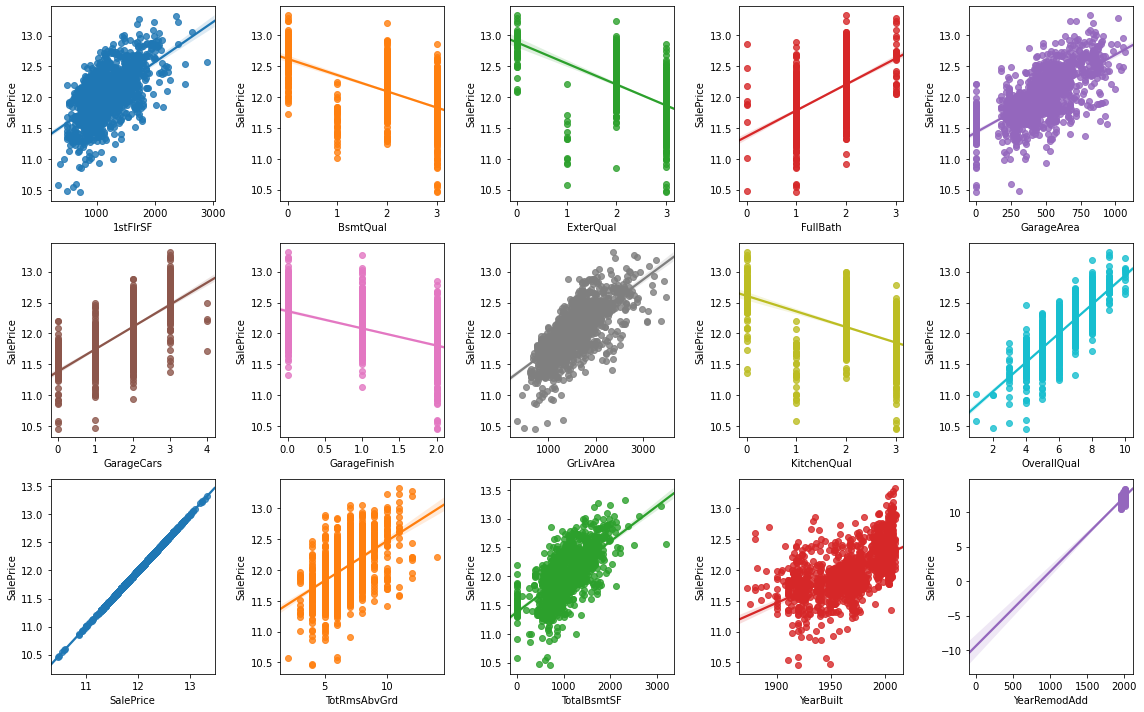

In [96]:
rows=3
cols=5
fig, ax=plt.subplots(nrows=rows,ncols=cols,figsize=(16,10))

col=correlated_data.columns
index=0

for i in range(rows):
    for j in range(cols):
        sns.regplot(x=correlated_data[col[index]],y=correlated_data['SalePrice'],ax=ax[i][j])
        index=index+1
fig.tight_layout()   

## Now lets find other combination of columns with threshold > 60%.

In [97]:
corrmat['SalePrice']

1stFlrSF        0.602947
2ndFlrSF        0.308817
3SsnPorch       0.058858
BedroomAbvGr    0.209374
BldgType       -0.067046
                  ...   
Utilities      -0.012483
WoodDeckSF      0.331565
YearBuilt       0.597911
YearRemodAdd    0.571290
YrSold         -0.028593
Name: SalePrice, Length: 75, dtype: float64

In [98]:
threshold=0.60
corr_value= getCorrelatedFeature(corrmat['SalePrice'],threshold)
corr_value

,Corr Value
1stFlrSF,0.602947
GarageArea,0.664392
GarageCars,0.684027
GrLivArea,0.711126
OverallQual,0.817487
SalePrice,1.000000
TotalBsmtSF,0.632820


In [99]:
correlated_data=df_Train[corr_value.index]
correlated_data

,1stFlrSF,GarageArea,GarageCars,GrLivArea,OverallQual,SalePrice,TotalBsmtSF
0,856,548.0,2.0,1710,7,12.247694,856.0
1,1262,460.0,2.0,1262,6,12.109011,1262.0
2,920,608.0,2.0,1786,7,12.317167,920.0
3,961,642.0,3.0,1717,7,11.849398,756.0
4,1145,836.0,3.0,2198,8,12.429216,1145.0
...,...,...,...,...,...,...,...
1455,953,460.0,2.0,1647,6,12.072541,953.0
1456,2073,500.0,2.0,2073,6,12.254863,1542.0
1457,1188,252.0,1.0,2340,7,12.493130,1152.0
1458,1078,240.0,1.0,1078,5,11.864462,1078.0


In [100]:
def get_y_predict(corr_data):
    X=corr_data.drop(labels=['SalePrice'],axis=1)
    Y=corr_data['SalePrice']
    
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
    model=LinearRegression()
    model.fit(X_train,Y_train)
    Y_predict=model.predict(X_test)
    return Y_predict

In [101]:
Y_predict=get_y_predict(correlated_data)

In [102]:
performance_metrics(correlated_data.columns.values,threshold,Y_test,Y_predict)

,feature names,number of features,corr_value,r2_score,mae,mse,rmse
0,['1stFlrSF' 'BsmtQual' 'ExterQual' 'FullBath' ...,14,0.5,0.857834,0.107809,0.0202418,0.142274
1,['1stFlrSF' 'GarageArea' 'GarageCars' 'GrLivAr...,6,0.6,0.838433,0.115883,0.0230041,0.151671


## lets find other combinations of columns with threshold > 70%

In [103]:
corrmat['SalePrice']

1stFlrSF        0.602947
2ndFlrSF        0.308817
3SsnPorch       0.058858
BedroomAbvGr    0.209374
BldgType       -0.067046
                  ...   
Utilities      -0.012483
WoodDeckSF      0.331565
YearBuilt       0.597911
YearRemodAdd    0.571290
YrSold         -0.028593
Name: SalePrice, Length: 75, dtype: float64

In [104]:
threshold=0.70
corr_value= getCorrelatedFeature(corrmat['SalePrice'],threshold)
corr_value

,Corr Value
GrLivArea,0.711126
OverallQual,0.817487
SalePrice,1.000000


In [105]:
correlated_data=df_Train[corr_value.index]
correlated_data

,GrLivArea,OverallQual,SalePrice
0,1710,7,12.247694
1,1262,6,12.109011
2,1786,7,12.317167
3,1717,7,11.849398
4,2198,8,12.429216
...,...,...,...
1455,1647,6,12.072541
1456,2073,6,12.254863
1457,2340,7,12.493130
1458,1078,5,11.864462


In [106]:
Y_predict=get_y_predict(correlated_data)

In [107]:
performance_metrics(correlated_data.columns.values,threshold,Y_test,Y_predict)

,feature names,number of features,corr_value,r2_score,mae,mse,rmse
0,['1stFlrSF' 'BsmtQual' 'ExterQual' 'FullBath' ...,14,0.5,0.857834,0.107809,0.0202418,0.142274
1,['1stFlrSF' 'GarageArea' 'GarageCars' 'GrLivAr...,6,0.6,0.838433,0.115883,0.0230041,0.151671
2,['GrLivArea' 'OverallQual' 'SalePrice'],2,0.7,0.772234,0.139503,0.0324297,0.180082


## Now lets select only 'OverallQual' feature.

In [108]:
correlated_data=df_Train[['OverallQual','SalePrice']]
correlated_data

,OverallQual,SalePrice
0,7,12.247694
1,6,12.109011
2,7,12.317167
3,7,11.849398
4,8,12.429216
...,...,...
1455,6,12.072541
1456,6,12.254863
1457,7,12.493130
1458,5,11.864462


In [109]:
Y_predict=get_y_predict(correlated_data)

In [110]:
performance_metrics(correlated_data.columns.values,threshold,Y_test,Y_predict)

,feature names,number of features,corr_value,r2_score,mae,mse,rmse
0,['1stFlrSF' 'BsmtQual' 'ExterQual' 'FullBath' ...,14,0.5,0.857834,0.107809,0.0202418,0.142274
1,['1stFlrSF' 'GarageArea' 'GarageCars' 'GrLivAr...,6,0.6,0.838433,0.115883,0.0230041,0.151671
2,['GrLivArea' 'OverallQual' 'SalePrice'],2,0.7,0.772234,0.139503,0.0324297,0.180082
3,['OverallQual' 'SalePrice'],1,0.7,0.685833,0.163027,0.0447315,0.211498


# lets find other combinations of columns with accuracy > 40 %

In [111]:
threshold=0.40
corr_value= getCorrelatedFeature(corrmat['SalePrice'],threshold)
corr_value

,Corr Value
1stFlrSF,0.602947
BsmtQual,-0.572239
ExterQual,-0.588600
Fireplaces,0.481163
Foundation,0.418368
FullBath,0.588720
GarageArea,0.664392
GarageCars,0.684027
GarageFinish,-0.576765
GarageYrBlt,0.409634


In [112]:
correlated_data=df_Train[corr_value.index]
correlated_data

,1stFlrSF,BsmtQual,ExterQual,Fireplaces,Foundation,FullBath,GarageArea,GarageCars,GarageFinish,GarageYrBlt,GrLivArea,HeatingQC,KitchenQual,MasVnrArea,OverallQual,SalePrice,TotRmsAbvGrd,TotalBsmtSF,YearBuilt,YearRemodAdd
0,856,2,2,0,2,2,548.0,2.0,1,2003.0,1710,0,2,196.0,7,12.247694,8,856.0,2003,2003
1,1262,2,3,1,1,2,460.0,2.0,1,1976.0,1262,0,3,0.0,6,12.109011,6,1262.0,1976,1976
2,920,2,2,1,2,2,608.0,2.0,1,2001.0,1786,0,2,162.0,7,12.317167,6,920.0,2001,2002
3,961,3,3,1,0,1,642.0,3.0,2,1998.0,1717,2,2,0.0,7,11.849398,7,756.0,1915,1970
4,1145,2,2,1,2,2,836.0,3.0,1,2000.0,2198,0,2,350.0,8,12.429216,9,1145.0,2000,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,953,2,3,1,2,2,460.0,2.0,1,1999.0,1647,0,3,0.0,6,12.072541,7,953.0,1999,2000
1456,2073,2,3,2,1,2,500.0,2.0,2,1978.0,2073,4,3,119.0,6,12.254863,7,1542.0,1978,1988
1457,1188,3,0,2,4,2,252.0,1.0,1,1941.0,2340,0,2,0.0,7,12.493130,9,1152.0,1941,2006
1458,1078,3,3,0,1,1,240.0,1.0,2,1950.0,1078,2,2,0.0,5,11.864462,5,1078.0,1950,1996


In [113]:
performance_metrics(correlated_data.columns.values,threshold,Y_test,Y_predict)

,feature names,number of features,corr_value,r2_score,mae,mse,rmse
0,['1stFlrSF' 'BsmtQual' 'ExterQual' 'FullBath' ...,14,0.5,0.857834,0.107809,0.0202418,0.142274
1,['1stFlrSF' 'GarageArea' 'GarageCars' 'GrLivAr...,6,0.6,0.838433,0.115883,0.0230041,0.151671
2,['GrLivArea' 'OverallQual' 'SalePrice'],2,0.7,0.772234,0.139503,0.0324297,0.180082
3,['OverallQual' 'SalePrice'],1,0.7,0.685833,0.163027,0.0447315,0.211498
4,['1stFlrSF' 'BsmtQual' 'ExterQual' 'Fireplaces...,19,0.4,0.685833,0.163027,0.0447315,0.211498


# Lets understand about Normalization and standardisation of data.

In [114]:
model=LinearRegression(normalize=True)
model.fit(X_train,Y_train)

LinearRegression(normalize=True)

In [115]:
y_predict=model.predict(X_test)
r2_score(Y_test,Y_predict)

0.6858332001384939

In [116]:
df_Test

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
17,1698,0,0,3,0,3,3,110.0,0.0,2,...,8,0,1,7,1698.0,0,192,2005,2005,2010
18,1822,0,0,3,0,3,3,28.0,0.0,2,...,8,0,1,8,1822.0,0,0,2005,2006,2010
19,2696,0,0,3,0,3,1,1373.0,0.0,2,...,8,0,1,10,2846.0,0,220,2003,2004,2010
20,1687,563,0,3,0,3,1,578.0,0.0,2,...,8,0,1,7,1671.0,0,238,2002,2002,2010
21,1370,0,0,2,4,3,2,24.0,0.0,2,...,8,0,1,6,1370.0,0,120,2006,2006,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,546,546,0,3,3,3,3,0.0,0.0,5,...,8,0,1,5,546.0,0,0,1970,1970,2006
1455,546,546,0,3,4,3,3,252.0,0.0,4,...,8,0,1,6,546.0,0,0,1970,1970,2006
1456,1224,0,0,4,0,3,3,1224.0,0.0,0,...,8,0,1,7,1224.0,0,474,1960,1996,2006
1457,970,0,0,3,0,3,0,337.0,0.0,2,...,8,0,1,6,912.0,0,80,1992,1992,2006


In [117]:
df_Train.shape

(1443, 75)

In [118]:
df_Test.shape

(1442, 74)

In [119]:
X1=df_Train.drop(labels=['SalePrice'],axis=1)                         
Y1=df_Train['SalePrice']
X1.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,0,3,3,706.0,0.0,2,...,8,0,1,8,856.0,0,0,2003,2003,2008
1,1262,0,0,3,0,3,1,978.0,0.0,0,...,8,0,1,6,1262.0,0,298,1976,1976,2007
2,920,866,0,3,0,3,2,486.0,0.0,2,...,8,0,1,6,920.0,0,0,2001,2002,2008
3,961,756,0,3,0,1,3,216.0,0.0,0,...,8,0,1,7,756.0,0,0,1915,1970,2006
4,1145,1053,0,4,0,3,0,655.0,0.0,2,...,8,0,1,9,1145.0,0,192,2000,2000,2008


In [120]:
X1.shape

(1443, 74)

In [121]:
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y1,test_size=0.2,random_state=0)
print(X1_train.shape,X1_test.shape,Y1_train.shape,Y1_test.shape)

(1154, 74) (289, 74) (1154,) (289,)


In [122]:
scaled=StandardScaler()
X1_train=scaled.fit_transform(X1_train)
X1_test=scaled.transform(X1_test)

In [123]:
model1=LinearRegression()
model1.fit(X1_train,Y1_train)

LinearRegression()

In [124]:
Y1_predict=model1.predict(X1_test)

In [125]:
score=r2_score(Y1_test,Y1_predict)
mae=mean_absolute_error(Y1_test,Y1_predict)
mse=mean_squared_error(Y1_test,Y1_predict)
rmse=(np.sqrt(mean_squared_error(Y1_test,Y1_predict)))
print('r2_score: ',score)
print('mean_absolute_error: ',mae)
print('mean_squared_error: ',mse)
print('root_mean_squared_error: ',rmse)

r2_score:  0.9082455034020465
mean_absolute_error:  0.08610301121329372
mean_squared_error:  0.013064140737783603
root_mean_squared_error:  0.11429847215857088


In [126]:
import lightgbm as lgb

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

model_lgb.fit(X1_train, Y1_train)

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
              feature_fraction=0.2319, feature_fraction_seed=9,
              learning_rate=0.05, max_bin=55, min_data_in_leaf=6,
              min_sum_hessian_in_leaf=11, n_estimators=720, num_leaves=5,
              objective='regression')

In [127]:
Y1_predict=model_lgb.predict(X1_test)

In [128]:
score=r2_score(Y1_test,Y1_predict)
mae=mean_absolute_error(Y1_test,Y1_predict)
mse=mean_squared_error(Y1_test,Y1_predict)
rmse=(np.sqrt(mean_squared_error(Y1_test,Y1_predict)))
print('r2_score: ',score)
print('mean_absolute_error: ',mae)
print('mean_squared_error: ',mse)
print('root_mean_squared_error: ',rmse)

r2_score:  0.9173852098997993
mean_absolute_error:  0.08072100955840447
mean_squared_error:  0.011762815828205911
root_mean_squared_error:  0.10845651584024775


In [129]:
from sklearn .model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, X1_train=X1_train, Y1_train=Y1_train):
    cv=KFold(n_splits=3, shuffle=True, random_state=0)
    r2=make_scorer(r2_score)
    r2_val_score=cross_val_score(model, X1_train, Y1_train, cv=cv, scoring=r2)
    score=[r2_val_score.mean()]
    return score

In [130]:
import sklearn.linear_model as linear_model
LR=linear_model.LinearRegression()

test_model(LR)

[-2.625126481706797e+22]

In [131]:
rdg=linear_model.Ridge()
test_model(rdg)

[0.887018070469301]

In [132]:
lasso=linear_model.Lasso(alpha=1e-4)
test_model(lasso)

C:\Users\Rahul\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.18954619136563622, tolerance: 0.012243226583054432
  positive)
C:\Users\Rahul\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05339653038261272, tolerance: 0.011507646279961271
  positive)
C:\Users\Rahul\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2054288017581456, tolerance: 0.011936176030354196
  positive)


[0.8874342670243555]

In [133]:
from sklearn.svm import SVR
svr_reg=SVR(kernel='rbf')
test_model(svr_reg)

[0.818423619324081]

In [134]:
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
br_reg = BaggingRegressor(n_estimators=1000, random_state=0)
gbr_reg = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, loss='ls',random_state=0)

test_model(br_reg)

[0.864174419643622]

In [135]:
test_model(gbr_reg)

[0.8937544664758631]

In [136]:
import xgboost
xgb_reg=xgboost.XGBRegressor()
test_model(xgb_reg)

[0.8576852359765654]

In [137]:
svr_reg.fit(X1_train,Y1_train)
y_pred=np.exp(svr_reg.predict(X1_test)).round(2)

In [138]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

params={'kernel':['rbf'],
       'gamma':[1,0.1,0.01,0.001,0.0001],
       'C':[0.1,1,10,100,1000],
       'epsilon':[1,0.2,0.1,0.01,0.001,0.0001]}
rand_search=RandomizedSearchCV(svr_reg,param_distributions=params,n_jobs=1,cv=11)
rand_search.fit(X1_train,Y1_train)
rand_search.best_score_

0.9060663905498036

In [139]:
xgb2_reg=xgboost.XGBRegressor(n_estimator=899, mon_child_weight=2,max_depth=8,learning_rate=0.33,booster='gbtree')
test_model(xgb2_reg)

[12:30:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { mon_child_weight, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:30:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { mon_child_weight, n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:30:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { mon_child_weight, n_estimator } might not be used.

  This may not be 

[0.8546693889962568]

In [140]:
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [141]:
test_df.drop(['Id'],axis=1,inplace=True)

In [142]:
test_df.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)

In [143]:
test_df["LotFrontage"]=test_df["LotFrontage"].fillna(test_df["LotFrontage"].mode()[0])
test_df["GarageYrBlt"]=test_df["GarageYrBlt"].fillna(test_df["GarageYrBlt"].mode()[0])          
test_df["GarageType"]=test_df["GarageType"].fillna(test_df["GarageType"].mode()[0])    # Mode has been used to impute the categorical data
test_df["GarageFinish"]=test_df["GarageFinish"].fillna(test_df["GarageFinish"].mode()[0])
test_df["GarageQual"]=test_df["GarageQual"].fillna(test_df["GarageQual"].mode()[0])
test_df["GarageCond"]=test_df["GarageCond"].fillna(test_df["GarageCond"].mode()[0])
test_df["BsmtFinType2"]=test_df["BsmtFinType2"].fillna(test_df["BsmtFinType2"].mode()[0])
test_df["BsmtExposure"]=test_df["BsmtExposure"].fillna(test_df["BsmtExposure"].mode()[0])
test_df["BsmtFinType1"]=test_df["BsmtFinType1"].fillna(test_df["BsmtFinType1"].mode()[0])
test_df["BsmtCond"]=test_df["BsmtCond"].fillna(test_df["BsmtCond"].mode()[0])
test_df["BsmtQual"]=test_df["BsmtQual"].fillna(test_df["BsmtQual"].mode()[0])
test_df["MasVnrType"]=test_df["MasVnrType"].fillna(test_df["MasVnrType"].mode()[0])
test_df["Electrical"]=test_df["Electrical"].fillna(test_df["Electrical"].mode()[0])
test_df["MSZoning"]=test_df["MSZoning"].fillna(test_df["MSZoning"].mode()[0])
test_df["Utilities"]=test_df["Utilities"].fillna(test_df["Utilities"].mode()[0])
test_df["Exterior1st"]=test_df["Exterior1st"].fillna(test_df["Exterior1st"].mode()[0])
test_df["Exterior2nd"]=test_df["Exterior2nd"].fillna(test_df["Exterior2nd"].mode()[0])
test_df["KitchenQual"]=test_df["KitchenQual"].fillna(test_df["KitchenQual"].mode()[0])
test_df["Functional"]=test_df["Functional"].fillna(test_df["Functional"].mode()[0])
test_df["SaleType"]=test_df["SaleType"].fillna(test_df["SaleType"].mode()[0])
test_df["GarageCars"]=test_df["GarageCars"].fillna(test_df["GarageCars"].mode()[0])

In [144]:
test_df["BsmtFinSF1"]=test_df["BsmtFinSF1"].fillna(test_df["BsmtFinSF1"].mean())
test_df["BsmtFinSF2"]=test_df["BsmtFinSF2"].fillna(test_df["BsmtFinSF2"].mean())                                                            
test_df["BsmtUnfSF"]=test_df["BsmtUnfSF"].fillna(test_df["BsmtUnfSF"].mean())        
test_df["TotalBsmtSF"]=test_df["TotalBsmtSF"].fillna(test_df["TotalBsmtSF"].mean()) 
test_df["BsmtFullBath"]=test_df["BsmtFullBath"].fillna(test_df["BsmtFullBath"].mean())
test_df["BsmtHalfBath"]=test_df["BsmtHalfBath"].fillna(test_df["BsmtHalfBath"].mean())
test_df["GarageArea"]=test_df["GarageArea"].fillna(test_df["GarageArea"].mean())
test_df["MasVnrArea"]=test_df["MasVnrArea"].fillna(test_df["MasVnrArea"].mean())    # Mean used to impute MasVnArea(numeric) column

In [145]:
cat_cols=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition']
le=LabelEncoder()
for i in cat_cols:
    test_df[i]=le.fit_transform(test_df[i])
test_df.dtypes

MSSubClass         int64
MSZoning           int32
LotFrontage      float64
LotArea            int64
Street             int32
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType           int32
SaleCondition      int32
Length: 74, dtype: object

In [146]:
train_preds= model_lgb.predict(test_df)

In [147]:
test_df['SalePrice'] = train_preds

In [148]:
test_df['SalePrice']

0       12.743057
1       12.767003
2       12.639902
3       12.698539
4       12.636584
          ...    
1454    12.559380
1455    12.596193
1456    12.442153
1457    12.614218
1458    12.723548
Name: SalePrice, Length: 1459, dtype: float64

In [149]:
import pickle
filename='AdvancedHousingPricesModel.pkl'
pickle.dump(model1,open(filename,'wb'))

In [150]:
submission=pd.read_csv('sample_submission.csv')

In [151]:
submission

,Id,SalePrice
0,1461,12.743057
1,1462,12.767003
2,1463,12.639902
3,1464,12.698539
4,1465,12.636584
...,...,...
1454,2915,12.559380
1455,2916,12.596193
1456,2917,12.442153
1457,2918,12.614218


In [152]:
submission.drop(['SalePrice'],axis=1,inplace=True)

In [153]:
submission

,Id
0,1461
1,1462
2,1463
3,1464
4,1465
...,...
1454,2915
1455,2916
1456,2917
1457,2918


In [154]:
mysub=pd.concat([submission['Id'],test_df['SalePrice']],axis=1)

In [155]:
mysub

,Id,SalePrice
0,1461,12.743057
1,1462,12.767003
2,1463,12.639902
3,1464,12.698539
4,1465,12.636584
...,...,...
1454,2915,12.559380
1455,2916,12.596193
1456,2917,12.442153
1457,2918,12.614218


In [156]:
test_df['SalePrice']

0       12.743057
1       12.767003
2       12.639902
3       12.698539
4       12.636584
          ...    
1454    12.559380
1455    12.596193
1456    12.442153
1457    12.614218
1458    12.723548
Name: SalePrice, Length: 1459, dtype: float64

In [157]:
mysub.to_csv('sample_submissiontry.csv',index=False)